# Synthetic data augmentation

This notebook demonstrates how the `IAMSyntheticDataGenerator` class is used to generate synthetic line/form images. The idea is to generate synthetic IAM samples by stitching together images of random words. This is possible because the IAM dataset includes word-level segmentation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
from pathlib import Path
from copy import copy

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import models
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
IAM_ROOT = '/home/tobias/datasets/IAM/'

In [4]:
def imshow(im):
    plt.imshow(im, cmap='gray')
    plt.axis('off')

This notebook demonstrates how the `IAMSyntheticDataGenerator` class is used to generate synthetic line/form images.

## Generate lines

In [5]:
from data import IAMSyntheticDataGenerator

# Initialize dataset.
ds_synth_line = IAMSyntheticDataGenerator(
    iam_root=IAM_ROOT,
    sample_form=False
)

might and join although often gavin showing for a.


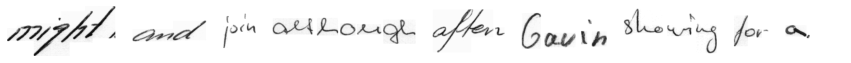

In [7]:
# Sample a synthetic image.
img, target = ds_synth_line[0]

plt.figure(figsize=(15, 10))
imshow(img)
print("".join(ds_synth_line.images.label_enc.inverse_transform(target)))

## Generate forms

In [18]:
from data import IAMSyntheticDataGenerator

# Initialize dataset.
ds_synth_form = IAMSyntheticDataGenerator(
    iam_root=IAM_ROOT,
    sample_form=True
)

school a story awaiting i nail households
of the loud between overcome at whole
'd sparingly. waving rear-attack, )
had addicted has american laos likely;
much prime copper designs churchyard all great
patterns, method the, want with
must. he to captive the quickly
by this matters man "advocated"
killed britain the are the preserved malady



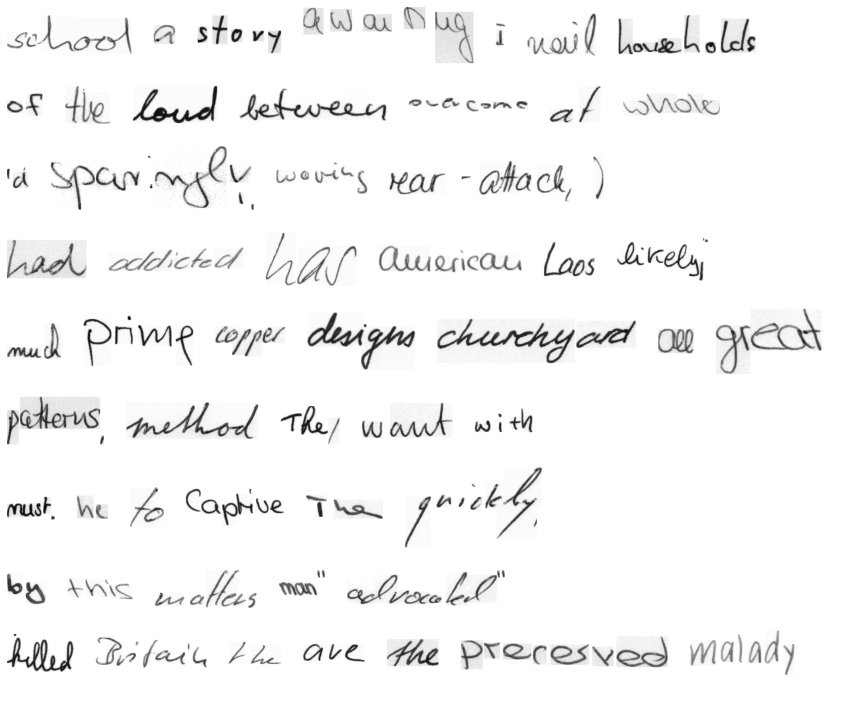

In [59]:
# Sample a synthetic image.
img, target = ds_synth_form[0]

plt.figure(figsize=(15, 25))
imshow(img)
print("".join(ds_synth_form.images.label_enc.inverse_transform(target)))